In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/synthetic_liver_cancer_dataset.csv'
df = pd.read_csv(path)
df

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,20.1,Regular,Never,0,0,68.2,6.73,1,0,Moderate,0,0
4996,80,Male,16.9,Never,Never,1,0,80.2,44.66,0,0,Low,0,0
4997,51,Female,23.1,Occasional,Never,0,0,65.7,7.64,0,1,Low,0,0
4998,76,Female,26.4,Never,Never,0,1,26.4,6.15,0,0,Low,0,0


In [ ]:
print(" First 5 rows of the DataFrame ")
print(df.head())

print("\n DataFrame Info ")
df.info()

print("\n Missing Values Count")
print(df.isnull().sum())

print("\n Descriptive Statistics ")
print(df.describe())

 First 5 rows of the DataFrame 
   age  gender   bmi alcohol_consumption smoking_status  hepatitis_b  \
0   68  Female  18.1             Regular         Former            0   
1   81  Female  19.9          Occasional          Never            0   
2   58  Female  25.5               Never          Never            0   
3   44    Male  16.0               Never         Former            0   
4   72    Male  21.0          Occasional         Former            0   

   hepatitis_c  liver_function_score  alpha_fetoprotein_level  \
0            0                  51.9                    16.44   
1            0                  41.6                     8.09   
2            0                  76.0                     0.64   
3            0                  50.3                    19.09   
4            0                  39.5                     4.95   

   cirrhosis_history  family_history_cancer physical_activity_level  diabetes  \
0                  0                      0                    

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


X = df.drop('liver_cancer', axis=1)
y = df['liver_cancer']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

print("\nCategorical features:", categorical_features.tolist())
print("Numerical features:", numerical_features.tolist())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_preprocessed = preprocessor.fit_transform(X)

onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)


all_feature_names = np.concatenate([numerical_features, onehot_feature_names])

X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

print("\nShape of preprocessed features DataFrame:", X_preprocessed_df.shape)
print("\nFirst 5 rows of preprocessed features:\n", X_preprocessed_df.head())

Shape of features (X): (5000, 13)
Shape of target (y): (5000,)

Categorical features: ['gender', 'alcohol_consumption', 'smoking_status', 'physical_activity_level']
Numerical features: ['age', 'bmi', 'hepatitis_b', 'hepatitis_c', 'liver_function_score', 'alpha_fetoprotein_level', 'cirrhosis_history', 'family_history_cancer', 'diabetes']

Shape of preprocessed features DataFrame: (5000, 20)

First 5 rows of preprocessed features:
         age       bmi  hepatitis_b  hepatitis_c  liver_function_score  \
0  0.682203 -1.528916    -0.422059      -0.3255             -0.894441   
1  1.505110 -1.176299    -0.422059      -0.3255             -1.586925   
2  0.049197 -0.079268    -0.422059      -0.3255              0.725838   
3 -0.837011 -1.940302    -0.422059      -0.3255             -1.002011   
4  0.935405 -0.960811    -0.422059      -0.3255             -1.728111   

   alpha_fetoprotein_level  cirrhosis_history  family_history_cancer  \
0                 0.087565          -0.657149          

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4000, 20)
Shape of X_test: (1000, 20)
Shape of y_train: (4000,)
Shape of y_test: (1000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


--- Model Evaluation Metrics ---
Accuracy: 0.9090
Precision: 0.9548
Recall: 0.6379
F1-Score: 0.7649


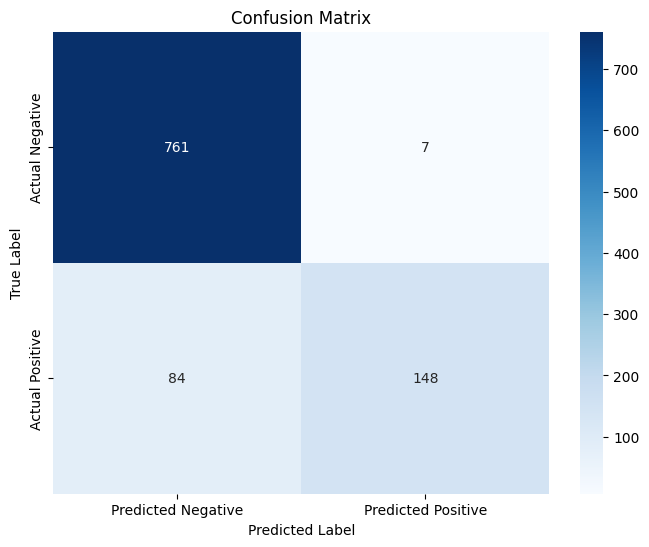

/tmp/ipython-input-317816444.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances.head(10).values, y=sorted_feature_importances.head(10).index, palette='viridis')


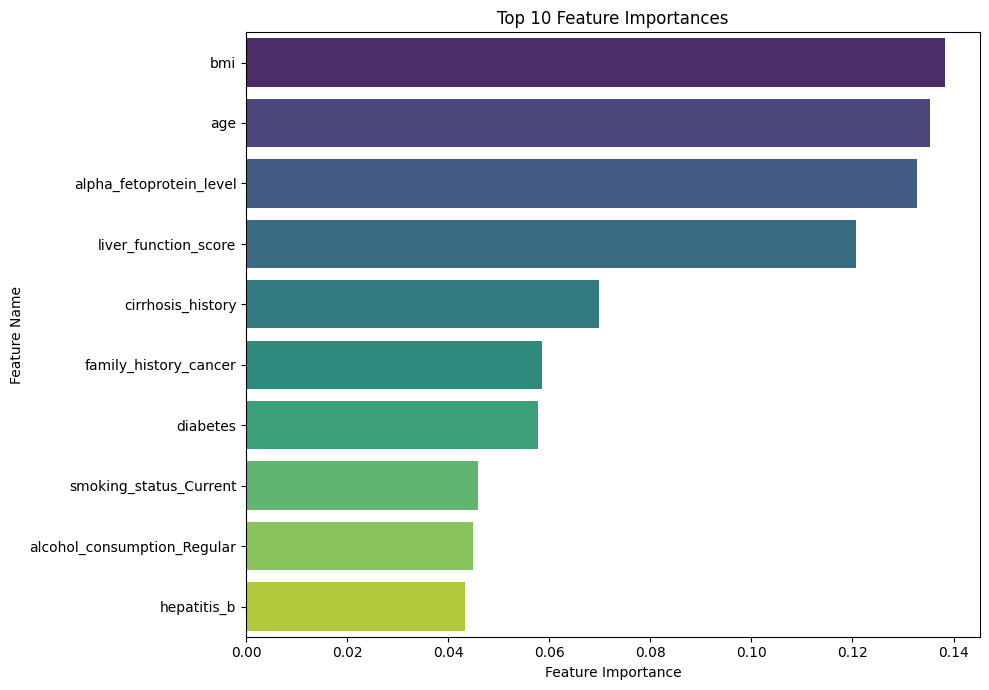

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("--- Model Evaluation Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

feature_importances = model.feature_importances_

feature_names = X_preprocessed_df.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=sorted_feature_importances.head(10).values, y=sorted_feature_importances.head(10).index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

--- Model Evaluation Metrics ---
Accuracy: 0.9090
Precision: 0.9548
Recall: 0.6379
F1-Score: 0.7649


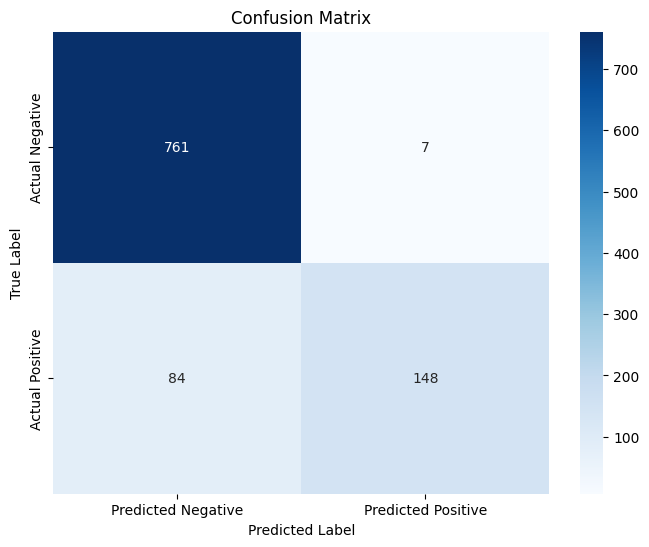

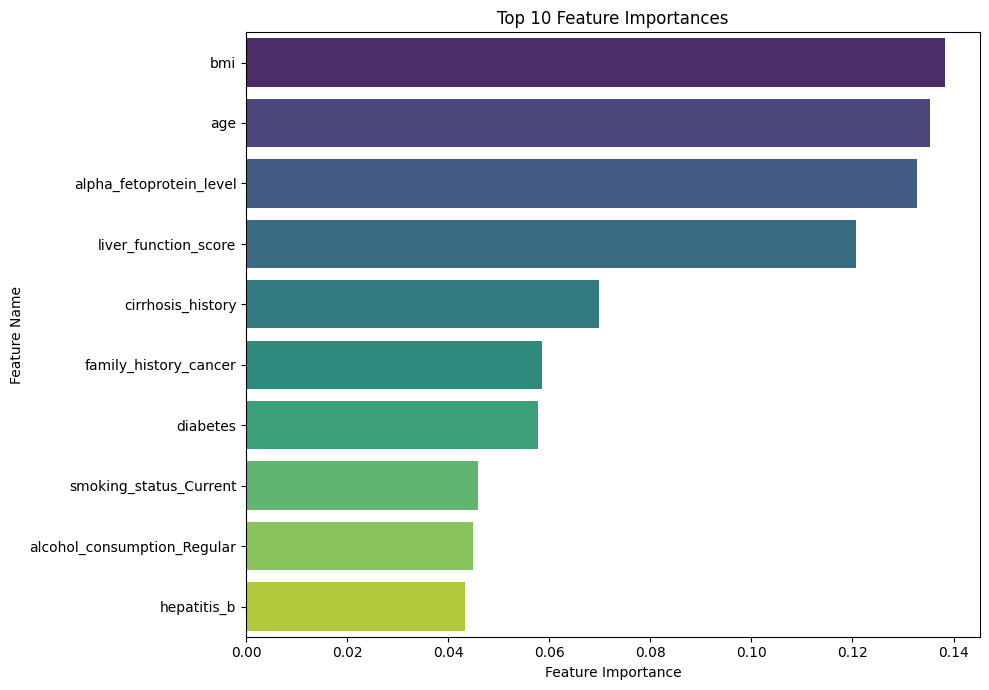

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("--- Model Evaluation Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

feature_importances = model.feature_importances_

feature_names = X_preprocessed_df.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=sorted_feature_importances.head(10).values, y=sorted_feature_importances.head(10).index, hue=sorted_feature_importances.head(10).index, palette='viridis', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()